### Topics to be discussed.
- Mean, Median, Mode and their relationship ==> Skewed Right, symmetric, Skewed Left
- Range, verience, standard deviation
- Normal distribution and standard deviation (1 standard deviation of the mean- 68%, 2 standard deviation 95%, 3 standard deviation 99.7%...)
- Z-score (standard deviation 1, mean = 0, z-score= number of sd)
- Inter quatile range.
- Statistical testing (t-test, one way, two way)
- Correlation
- Hypotheis testing

### Problem 1: Mean, Median, Mode
A retail company wants to analyze the sales data of its top-selling product over the past year to gain insights into customer purchasing behavior. The company has collected daily sales data for this product and wants to understand the central tendency of sales figures. By calculating the mean, median, and mode of the sales data, the company aims to identify patterns, understand typical sales volumes, and detect any skewness or anomalies in the sales distribution. Generate the daily sales data for a year by yourself. Analyze the result.
- use daily_sales.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./data/daily_sales.csv")
df.head()

,Daily Sales
0,23
1,15
2,21
3,25
4,15


In [3]:
print("The mean is: \n",df.mean())

The mean is: 
 Daily Sales    19.69589
dtype: float64


In [4]:
print("The median is: \n",df.median())

The median is: 
 Daily Sales    20.0
dtype: float64


In [5]:
print("The mode is: \n",df.mode())

The mode is: 
    Daily Sales
0           22


### Problem 2: Data distribution and plots
You are tasked with analyzing the average monthly sales data of a retail store chain over the past year to determine if there has been a significant change in sales compared to the previous year. This analysis will help the store management understand the performance trends and plan future strategies accordingly. Load sales_data.csv.
- find mean sales
- find median sales
- find mode sales
- find skewness
- plot histogram
- density plot

In [6]:
df_sales = pd.read_csv('./data/sales_data.csv')
df_sales

,Month,Sales
0,2023-01-31,15292.157038
1,2023-02-28,11200.471625
2,2023-03-31,12936.213952
3,2023-04-30,16722.679598
4,2023-05-31,15602.673970
5,2023-06-30,7068.166360
6,2023-07-31,12850.265253
7,2023-08-31,9545.928375
8,2023-09-30,9690.343445
9,2023-10-31,11231.795506


In [7]:
print("The mean of Sales is:\n",df_sales['Sales'].mean())

The mean of Sales is:
 12244.63719635305


In [8]:
print("The median of Sales is:\n",df_sales['Sales'].median())

The median of Sales is:
 12041.030379195941


In [9]:
print("The mode of Sales is:\n",df_sales['Sales'].mode())

The mode of Sales is:
 0      7068.166360
1      9545.928375
2      9690.343445
3     10432.130713
4     11200.471625
5     11231.795506
6     12850.265253
7     12936.213952
8     14362.820521
9     15292.157038
10    15602.673970
11    16722.679598
Name: Sales, dtype: float64


In [10]:
print("The skewness of Sales is:\n",df_sales['Sales'].skew())

The skewness of Sales is:
 -0.07734448027250686


### Negative skew means it has longer tail of left side, meaning more data are concentrated on right side. So, Median is generally higher than Mean but in this case it is not.

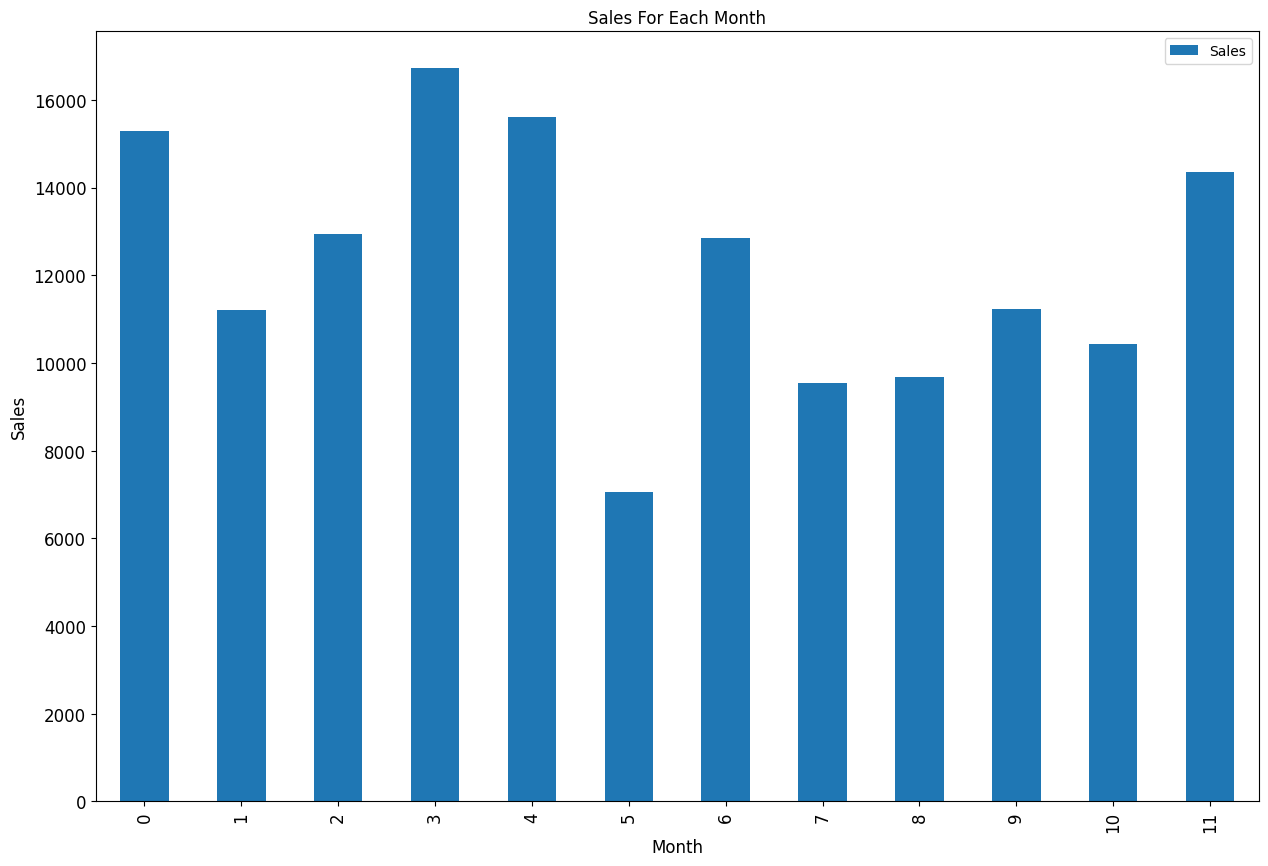

In [11]:
import matplotlib.pyplot as plt
ax = df_sales['Sales'].plot(kind='bar', title ="Sales For Each Month", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Sales", fontsize=12)
plt.show()

<Axes: ylabel='Density'>

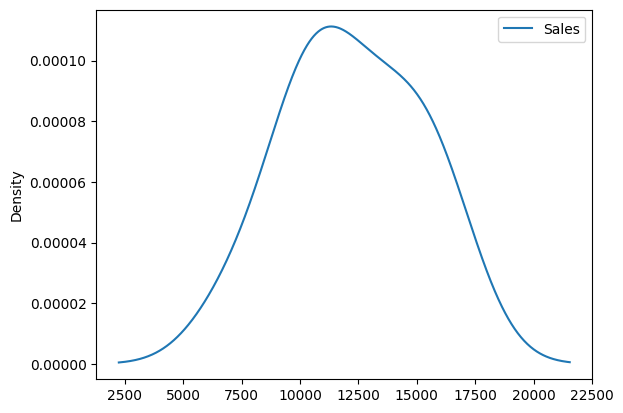

In [12]:
df_sales.plot.density()

### Problem 3: Outlier detection
A university wants to analyze the exam scores of a statistics class to identify any students whose scores are significantly different from the rest. Detecting outliers will help the university provide additional support to struggling students or recognize exceptionally high performers. The university decides to use both the Z-score and the Interquartile Range (IQR) methods to identify these outliers in the exam scores dataset.
- Generate the subject score for full mark 100 for 50 students.

Hints:
- Z-score is greater than 3.
- below - Q1−1.5×IQR or above Q3+1.5×IQR

In [13]:
rng = np.random.default_rng()
marks = rng.poisson(70, 50)
marks
marks[0] = 1 # Adding outlier manually
marks

array([ 1, 54, 77, 74, 56, 73, 70, 72, 76, 74, 81, 65, 73, 83, 68, 66, 72,
       63, 40, 62, 72, 72, 69, 60, 72, 69, 79, 83, 77, 65, 70, 70, 68, 78,
       72, 78, 80, 65, 61, 66, 74, 67, 71, 59, 92, 63, 76, 62, 86, 70])

In [14]:
q1 = np.percentile(marks, 25)  # Q1
print("Q1: ",q1)
q3 = np.percentile(marks, 75)  # Q3
print("Q3: ",q3)
inter_quartile_range = q3 - q1
print("Inter Quarter Range: ",inter_quartile_range)

Q1:  65.0
Q3:  75.5
Inter Quarter Range:  10.5


In [15]:
# Initializing empty list to add outliers
outliers_marks = []
outliers_index = []
outliers_marks
outliers_index

[]

In [16]:
# Algorithm
for i,mark in enumerate(marks):
    if mark < q1-1.5*inter_quartile_range or mark > q3+1.5*inter_quartile_range:
        outliers_marks.append(mark)
        outliers_index.append(i)

print(outliers_marks)
print(outliers_index)

[1, 40, 92]
[0, 18, 44]


## Outlier Detection by Z Score

In [17]:
# Functin to calculate Z-score for each data point
def calculate_z_score(data_list):
    """
    Calculate Z-score for each data point in a NumPy array.

    Parameters:
    data_list (numpy.ndarray): Input array of data points.

    Returns:
    numpy.ndarray: Z-scores corresponding to each data point.
    """
    if not isinstance(data_list, np.ndarray):
        raise TypeError("Input data_list must be a NumPy array")

    mean_of_data_list = np.mean(data_list)
    standard_deviation_of_data_list = np.std(data_list)

    # Avoid division by zero if standard deviation is zero
    if standard_deviation_of_data_list == 0:
        raise ValueError("Standard deviation of data_list is zero. Cannot compute Z-score.")

    z_scores = (data_list - mean_of_data_list) / standard_deviation_of_data_list
    return z_scores

In [18]:
z_scores = calculate_z_score(marks)
print(z_scores)

[-5.21607911 -1.14581714  0.62052296  0.39013077 -0.99222235  0.31333337
  0.08294119  0.23653598  0.54372556  0.39013077  0.92771254 -0.30104579
  0.31333337  1.08130733 -0.0706536  -0.2242484   0.23653598 -0.45464058
 -2.22098068 -0.53143798  0.23653598  0.23653598  0.00614379 -0.68503277
  0.23653598  0.00614379  0.77411775  1.08130733  0.62052296 -0.30104579
  0.08294119  0.08294119 -0.0706536   0.69732035  0.23653598  0.69732035
  0.85091514 -0.30104579 -0.60823537 -0.2242484   0.39013077 -0.147451
  0.15973858 -0.76183016  1.77248389 -0.45464058  0.54372556 -0.53143798
  1.31169952  0.08294119]


In [19]:
''' Z scores having value greater than 3 or
    less than -3 are Outliers in data '''
def outlier_detection(marks, z_scores_list, standard_deviation):
    outliers_index = np.abs(z_scores_list) > 3
    return outliers_index, marks[outliers_index]

outliers_index, outlier_marks = outlier_detection(marks, z_scores, np.std(marks))
print("The index of Outliers are as:\n",outliers_index)
print("The outlier marks are:\n",outlier_marks)

The index of Outliers are as:
 [ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
The outlier marks are:
 [1]


### Problem 4: t-test for ML models
Your task is to write Python code to perform t-tests on the testing results of five different machine learning algorithms. First, generate testing results for each of the five models, with each model having results for 50 test sets. Then, using these generated results, conduct t-tests to compare the results of the first model with those of each of the remaining four models. The goal is to determine if there is a statistically significant difference between the performance of the first model and each of the other models. Finally, print the results of each t-test, which will include the t-statistic and p-value for each comparison. And analyze the result whether the methods are statistically significant or not. What does it mean?

In [20]:
# Generate testing results for 5 models with 50 test sets each
np.random.seed(91)  # For reproducibility

num_test_sets = 50
num_models = 5

results = []
for i in range(num_models):
    # Generate random testing results (example: accuracy scores)
    model_results = np.random.rand(num_test_sets) * 100  # Example results (0-100)
    results.append(model_results)

# Convert results to NumPy array for easier handling
results = np.array(results)

In [21]:
from scipy import stats

# Perform t-tests between the first model and each of the other models
for i in range(1, num_models):
    model1_results = results[0]  # Results of the first model
    model2_results = results[i]  # Results of the current comparison model
    
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(model1_results, model2_results)
    
    # Print results
    print(f"T-test between Model 1 and Model {i + 1}:")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    print("---------------------------------------")


T-test between Model 1 and Model 2:
T-statistic: -1.4448293647931956
P-value: 0.1516957251871068
---------------------------------------
T-test between Model 1 and Model 3:
T-statistic: -2.088840239803215
P-value: 0.039313575847350166
---------------------------------------
T-test between Model 1 and Model 4:
T-statistic: -0.7614442373840565
P-value: 0.44822025693045875
---------------------------------------
T-test between Model 1 and Model 5:
T-statistic: -0.23628025454987908
P-value: 0.8137083446320889
---------------------------------------


### T-statistic: Measures the difference between the means of two groups (models in this case) relative to the variation within the groups. A larger t-statistic suggests a larger difference between the groups.

### P-value: Indicates the probability of observing the data (or more extreme results) under the assumption that the null hypothesis is true (i.e., there is no difference between the models). A lower p-value (typically below a significance level like 0.05) suggests stronger evidence **against** the null hypothesis, indicating that the difference is statistically significant.

## If we take p-value to be 0.04, then the results of Model 1 and # are significantly different from eachother. The results of Model 1 and other models are not significantly different.

### Problem 5: Correlation Analysis
- A coffee shop owner wants to determine whether there is a relationship between the amount of coffee sold and the temperature outside. The owner collects data on the number of cups of coffee sold and the temperature outside for 20 days.
- Download mtcars.csv file and perform the correlation analysis. See the result and analyze it. Also plot the heatmap for it.

## Coffee Shop Analysis

In [22]:
# Set seed for reproducibility
np.random.seed(81)

num_days = 20

# Generate random temperature data (assuming temperatures between 0 and 30 degrees Celsius)
temperatures = np.random.uniform(0, 30, num_days)

# Define linear relationship between coffee sold and temperature with some random noise
# Assume on average, coffee sold increases by 2 cups for every 5-degree increase in temperature
# Add random noise for variability
coffee_sold = (temperatures / 5 * 2) + np.random.normal(loc = 10, scale = 3, size = num_days)
# coffee_sold = np.random.normal(10, 3, num_days)
# Convert float array to integer array
coffee_sold = coffee_sold.astype(int)

# Print generated data for verification
print("Day\tTemperature (C)\tCoffee Sold")
print("----------------------------------")
for day in range(num_days):
    print(f"{day + 1}\t{temperatures[day]:.2f}\t\t{coffee_sold[day]}")

Day	Temperature (C)	Coffee Sold
----------------------------------
1	10.66		14
2	10.23		15
3	27.99		23
4	27.41		20
5	25.12		21
6	1.78		11
7	7.45		9
8	15.27		13
9	2.69		12
10	23.55		15
11	11.97		12
12	13.28		11
13	23.05		19
14	16.98		15
15	7.36		13
16	16.35		10
17	4.34		10
18	13.47		11
19	13.96		12
20	21.52		17


In [23]:
def calculate_correlation_coefficient(x, y, n):
    """
    Calculate Karl Pearson's correlation coefficient.

    Parameters:
    x (numpy.ndarray) : Temperatures
    y (numpy.ndarray) : Coffee Sales
    n (integer) : Number of days

    Returns:
    float : Karl Pearson's Coefficient
    """
    xy = x*y
    x_2 = np.square(x)
    y_2 = np.square(y)
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    xy_sum = np.sum(xy)
    x_2_sum = np.sum(x_2)
    y_2_sum = np.sum(y_2)
    r = ( n * xy_sum - x_sum * y_sum )/( np.sqrt((n*x_2_sum - x_sum**2) * (n*y_2_sum - y_sum**2) ) )
    return r
    
    # Compute sums and products
    # xy_sum = np.sum(x * y)
    # x_sum = np.sum(x)
    # y_sum = np.sum(y)
    # x_2_sum = np.sum(x**2)
    # y_2_sum = np.sum(y**2)
    
    # # Calculate correlation coefficient (r)
    # numerator = n * xy_sum - x_sum * y_sum
    # denominator = np.sqrt((n * x_2_sum - x_sum**2) * (n * y_2_sum - y_sum**2))
    # r = numerator / denominator
    
    # return r

r = calculate_correlation_coefficient(temperatures, coffee_sold, num_days)
print("Correlation Coefficient: ", r)

Correlation Coefficient:  0.8136362143293885


## Correlation Coefficient close to 1 means there lies strong relationship between Temperature and Coffee Sold.

In [24]:
df = pd.read_csv('./data/mtcars.csv')
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [25]:
!pip install seaborn
import seaborn as sns
# For Heatmap Plot

Correlation Matrix:
           mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659  0.418684   
cyl  -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242   
disp -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698   
hp   -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223   
drat  0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205   
wt   -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716   
qsec  0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535   
am    0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682   
carb -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249   

            vs        am      gear      car

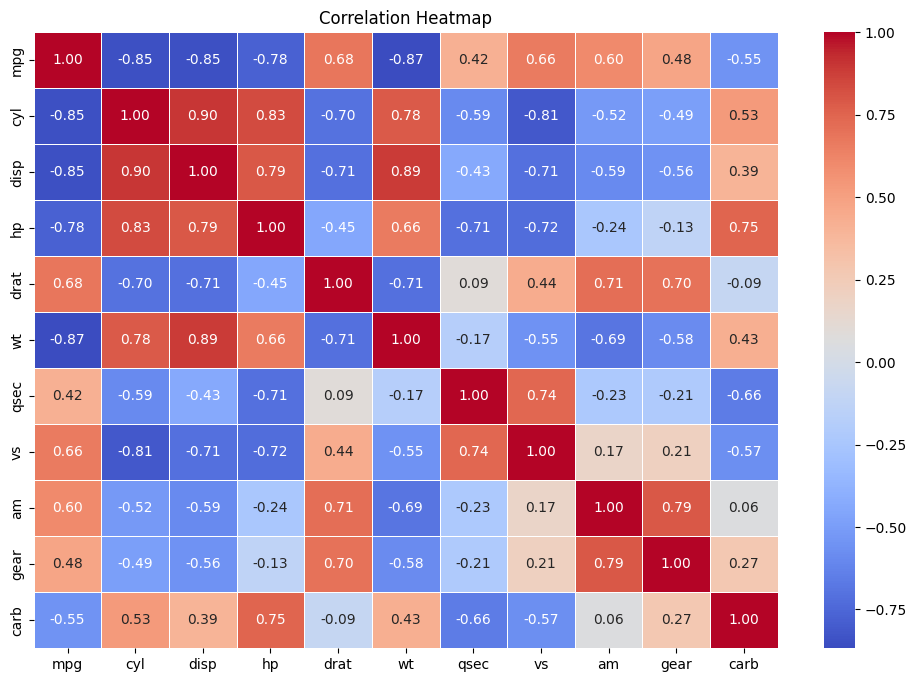

In [26]:
# Remove 'model' column and create a new DataFrame that has only Numeric Columns for Correlation Analysis
df_numeric = df.drop(columns=['model'])

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Problem 6: Hypothesis testing
Imagine a company, samsung, that manufactures a popular smartphone. They have introduced a new battery designed to last longer than the previous model, which had an average battery life of 10 hours. To determine if the new battery indeed lasts longer, samsung conducts a study where they test 30 smartphones with the new battery and record their battery life. The goal is to test the hypothesis that the mean battery life of the new batteries is greater than 10 hours using a one-tailed test.

Hypothesis:
- Null Hypothesis (H₀): The mean battery life of the new battery is 10 hours.
- Alternative Hypothesis (H₁): The mean battery life of the new battery is greater than 10 hours.

## Formula
### t = ( x_bar - μ0 ) / ( s/sqrt(n) )

### x_bar is the sample mean,
### μ0 is the hypothesized population mean under the null hypothesis (10 hours),
### s is the sample standard deviation,
### n is the sample size (30 in this case).

In [27]:
# Set seed for reproducibility
np.random.seed(101)

# Number of samples
n = 30
# Hypothesized Population Mean (miu)
miu = 10

# Generate random Average Battery Life data (assuming Mean is 10 hours and Standard Deviation is 3)
"""
Change the value of loc(mean) below to obtain various diffrent data and thus results.
"""
avg_battery_life = np.random.normal(loc = 12, scale = 3, size = n) 
print("Average batttery life:",avg_battery_life)

sample_mean = np.mean(avg_battery_life)
sample_standard_deviation = np.std(avg_battery_life)
t = (sample_mean - miu)/(sample_standard_deviation/np.sqrt(n))
print("T-value: ",t)

Average batttery life: [20.12054952 13.88439813 14.72390834 13.51147726 13.95335384 11.04204587
  9.45576905 13.81789605  5.94549527 14.22036617 13.58644048 10.2329984
 12.56608593  9.72338383  9.20028835 14.86516953 12.57238297 17.93627197
 19.81790184 14.05052666 12.90799635 17.08116878  6.88174221  8.52264175
 11.59547784 13.17158353 12.50071391 12.55350558 14.42311774 12.21887903]
T-value:  4.931150333408257


### Find the critical value from the t-distribution table with 29 degrees of freedom (since n−1=30−1=29) for a one-tailed test at α = 0.05. Let's assume the critical value (from the table) is 1.699 (this value is illustrative, actual critical value may differ based on degrees of freedom and α).

In [28]:
critical_value = 1.699
if(t > critical_value):
    print("Null Hypothesis rejected. Battery Life has signifiantly improved, > 10 hours!")
else:
    print("Null Hypothesis accepted. Battery Life has no significant improvement.")

Null Hypothesis rejected. Battery Life has signifiantly improved, > 10 hours!


## Summarizing categorical variables

1. Frequency table
	1. Value count of blood type
	2. Value count of gender
	3. Value count as proportions
2. Contengency table
	1. Cross table of bloodtype and gender
	2. explore margins
3.
## Interval Estimation of the Proportion

```
HINT: explore st.norm.interval
```

1.  There are two candidates for the election: A and B.
The candidate A wants to survey his approval rating.
Out of 100 suerveyed, 55 answered positively.
Can A be sure of this election?
- Assume that A gets elected with 50% or more.
- Use 95% confidence interval.



2. Out of 1000 suerveyed, 550 answered positively. Can A be sure of this election?
- Assume that A gets elected with 50% or more.
- Use 95% confidence interval.


### How can we know that the three groups are same or different?

- There are three groups of students. The data corresponds to the test scores. Determine whether there is any significant difference in the group test scores.
```python
# Data
x1 = np.array([82,93,61,74,69,70,53])
x2 = np.array([71,62,85,94,78,66,71])
x3 = np.array([64,73,87,91,56,78,87])
```


## Solution to Question 1

In [29]:
"""
Null Hypothesis: H0 : p >= 0.5
Alternative Hypothesis Ha : p < 0.5

Using Large Sample Z-test for proportion
"""
n = 100
p_cap = 55/n # Sample Proportion
p_0 = 0.5 # Estimated Population Proportion
z = (p_cap - p_0)/np.sqrt(p_0*(1-p_0)/n)
print(f"The test-statistic value (z value) is {z}.")
"""
The z-value for a 95% confidence interval is 1.96.
"""
z_value_for_95_confidence_interval = 1.96
if (z > z_value_for_95_confidence_interval):
    print("The candidate A is sure to win the election with above 50% votes. :)")
else:
    print("The candidate A is NOT sure to win the election with above 50% votes. :(")

The test-statistic value (z value) is 1.0000000000000009.
The candidate A is NOT sure to win the election with above 50% votes. :(


## Using st.norm.interval
### The st.norm.interval function from the scipy.stats module in Python is used to calculate the confidence interval for a normal distribution.

In [31]:
import scipy.stats as st

# Given data
x = 55
n = 100
confidence_level = 0.95

# Sample proportion
p_hat = x / n

# Standard error
se = np.sqrt(p_hat * (1 - p_hat) / n)

# Confidence interval
ci = st.norm.interval(confidence_level, loc=p_hat, scale=se)
print(ci)

(0.45249302291006066, 0.6475069770899394)


In [37]:
"""
If lower bound of confidence interval is greater than 0.5, then A is sure to win with votes > 50%.
"""
if ci[0] > 0.5:
    print("The candidate A is sure to win the election with above 50% votes. :)")
else:
    print("The candidate A is NOT sure to win the election with above 50% votes. :(")

The candidate A is sure to win the election with above 50% votes. :)


## Solution to Question 2

In [30]:
"""
Null Hypothesis: H0 : p >= 0.5
Alternative Hypothesis Ha : p < 0.5

Using Large Sample Z-test for proportion
"""
n = 1000
p_cap = 550/n # Sample Proportion
p_0 = 0.5 # Estimated Population Proportion
z = (p_cap - 0.5)/np.sqrt(p_0*(1-p_0)/n)
print(f"The test-statistic value (z value) is {z}.")
"""
The z-value for a 95% confidence interval is 1.96.
"""
z_value_for_95_confidence_interval = 1.96
if (z > z_value_for_95_confidence_interval):
    print("The candidate A is sure to win the election with above 50% votes. :)")
else:
    print("The candidate A is NOT sure to win the election with above 50% votes. :(")

The test-statistic value (z value) is 3.162277660168382.
The candidate A is sure to win the election with above 50% votes. :)


## Using st.norm.interval
### The st.norm.interval function from the scipy.stats module in Python is used to calculate the confidence interval for a normal distribution.

In [35]:
# Given data
x = 550
n = 1000
confidence_level = 0.95

# Sample proportion
p_hat = x / n

# Standard error
se = np.sqrt(p_hat * (1 - p_hat) / n)

# Confidence interval
ci = st.norm.interval(confidence_level, loc=p_hat, scale=se)
print(ci)

(0.5191655864637935, 0.5808344135362066)


In [38]:
"""
If lower bound of confidence interval is greater than 0.5, then A is sure to win with votes > 50%.
"""
if ci[0] > 0.5:
    print("The candidate A is sure to win the election with above 50% votes. :)")
else:
    print("The candidate A is NOT sure to win the election with above 50% votes. :(")

The candidate A is sure to win the election with above 50% votes. :)


## Test of Significance Test by One Way Anova

In [39]:
# Data
x1 = np.array([82,93,61,74,69,70,53])
x2 = np.array([71,62,85,94,78,66,71])
x3 = np.array([64,73,87,91,56,78,87])

In [41]:
# Perform One Way Anova Test
f_statistics, p_value = st.f_oneway(x1, x2, x3)

print(f"F-statistic: {f_statistics}")
print(f"P-Value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the group test scores.")
else:
    print("There is no signigicant difference in the group test scores.")

F-statistic: 0.2837261275904103
P-Value: 0.7562784116739912
There is no signigicant difference in the group test scores.
